In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [16]:
songs = pd.read_csv('API Scraping Data/pop2000_2023.csv')

In [17]:
songs = songs[songs['popularity'] >= 50]

<AxesSubplot:xlabel='popularity', ylabel='Count'>

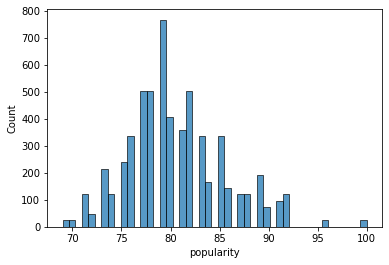

In [18]:
sns.histplot(data = songs, x = 'popularity')

In [21]:
songs['pop'] = [1 if x >= 80 else 0 for x in songs['popularity'] ]

In [40]:
songs.head()

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,pop,dance_binned,binned
0,100,2000,pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,...,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,1,"(0.665, 0.707]","(0.0623, 0.11]"
1,92,2000,pop,0.644,0.728,8,-5.750,1,0.0351,0.0543,...,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,1,"(0.631, 0.665]","(0.0267, 0.0623]"
2,92,2000,pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,...,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,1,"(0.631, 0.665]","(0.0267, 0.0623]"
3,90,2000,pop,0.684,0.607,11,-8.127,0,0.1000,0.0267,...,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4,1,"(0.665, 0.707]","(0.00883, 0.0267]"
4,89,2000,pop,0.561,0.520,11,-9.342,0,0.2440,0.0503,...,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3,1,"(0.511, 0.561]","(0.0267, 0.0623]"


In [37]:
binned = pd.qcut(songs['acousticness'], 10, retbins = True)
songs['binned'] = binned[0]
songs

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,pop,dance_binned,binned
0,100,2000,pop,0.707,0.681,0,-4.325,1,0.0668,0.06320,...,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,1,"(0.665, 0.707]","(0.0623, 0.11]"
1,92,2000,pop,0.644,0.728,8,-5.750,1,0.0351,0.05430,...,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,1,"(0.631, 0.665]","(0.0267, 0.0623]"
2,92,2000,pop,0.644,0.735,8,-5.747,1,0.0391,0.05210,...,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,1,"(0.631, 0.665]","(0.0267, 0.0623]"
3,90,2000,pop,0.684,0.607,11,-8.127,0,0.1000,0.02670,...,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4,1,"(0.665, 0.707]","(0.00883, 0.0267]"
4,89,2000,pop,0.561,0.520,11,-9.342,0,0.2440,0.05030,...,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3,1,"(0.511, 0.561]","(0.0267, 0.0623]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,82,2023,pop,0.792,0.625,1,-5.609,1,0.0536,0.00776,...,audio_features,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0,https://api.spotify.com/v1/tracks/1zi7xx7UVEFk...,https://api.spotify.com/v1/audio-analysis/1zi7...,173987,4,1,"(0.749, 0.799]","(-0.00099247, 0.00883]"
5996,81,2023,pop,0.748,0.524,8,-5.599,1,0.0338,0.41400,...,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4,1,"(0.707, 0.749]","(0.383, 0.532]"
5997,77,2023,pop,0.608,0.756,7,-2.675,0,0.1760,0.07840,...,audio_features,5BKKy9fIJL5uM9fz1SnqyP,spotify:track:5BKKy9fIJL5uM9fz1SnqyP,https://api.spotify.com/v1/tracks/5BKKy9fIJL5u...,https://api.spotify.com/v1/audio-analysis/5BKK...,245507,4,0,"(0.591, 0.631]","(0.0623, 0.11]"
5998,77,2023,pop,0.734,0.605,1,-8.476,1,0.0699,0.01020,...,audio_features,7GeTsDIc5ykNB6lORO6Cee,spotify:track:7GeTsDIc5ykNB6lORO6Cee,https://api.spotify.com/v1/tracks/7GeTsDIc5ykN...,https://api.spotify.com/v1/audio-analysis/7GeT...,236795,4,0,"(0.707, 0.749]","(0.00883, 0.0267]"


In [38]:
binned_data = songs.groupby('binned')['pop'].agg([('outcome_pct', 'mean'), ('nobs','count')]).reset_index(drop=False)
binned_data

,binned,outcome_pct,nobs
0,"(-0.00099247, 0.00883]",0.520000,600
1,"(0.00883, 0.0267]",0.360000,600
2,"(0.0267, 0.0623]",0.560000,600
3,"(0.0623, 0.11]",0.625000,576
4,"(0.11, 0.146]",0.440000,600
5,"(0.146, 0.241]",0.480000,600
6,"(0.241, 0.383]",0.666667,576
7,"(0.383, 0.532]",0.360000,600
8,"(0.532, 0.695]",0.576923,624
9,"(0.695, 0.947]",0.521739,552


Text(0.5, 0, 'Bin')

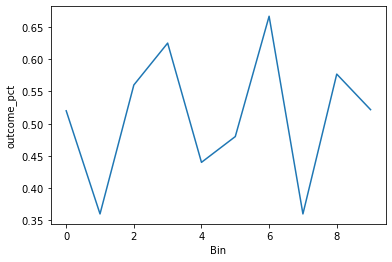

In [39]:
sns.lineplot(x = binned_data.index, y= binned_data['outcome_pct'])
plt.xlabel('Bin')